# Face tracking by using CNNs

In [117]:
from matplotlib import pyplot as plt
from PIL import Image
import torch
import cv2
import os
import numpy as np

### 1. DATASET


DATASET from WIDER FACE: A Face Detection Benchmark

link: https://shuoyang1213.me/WIDERFACE/

    1. download WIDER Face Training Images (used for training)
    2. download WIDER Face Validation Images (used for testing since WIDER face test images are not annotated)
    3. download Face Annotations
            -- from this file extract wider_face_train_bbx_gt.txt and wider_face_val_bbx_gt.txt (these txt files contain bounding box of face for each image(left, top, width, height))
    

main directory should look like this:

<img src="directory.png"
     alt="cirectories"
     style="float: left; margin-right: 10px;" />

#### Data for bounding box

In [118]:
# function to create annotation for each image (path of image + bounding box of face)

def create_annotations(path, pres):
    images_info = []
    
    with open(path) as f:
        lines = f.readlines()

    i = 0
    while i < len(lines):
        tmp = lines[i+1]

        if int(tmp)==1: #one person per image
            image_info = []

            image_path = pres + lines[i]    #image name
            bounds = lines[i+2].split(" ")
            x = int(bounds[0])  # x to left
            y = int(bounds[1])  # top
            width = int(bounds[2]) # width of face
            height = int(bounds[3]) # height of face

            image_info.extend([image_path.strip(), x, y, width, height])
            images_info.append(image_info)

            i = i + 3
        else:
            if int(tmp) == 0:
                i = i + 3
            else :   
                i = i + int(tmp) + 2
        
    return images_info

In [119]:
#train dataset annotation
path = "wider_face_train_bbx_gt.txt"
images_info_train = create_annotations(path, "WIDER_train/images/")

In [120]:
#test dataset annotation
path = "wider_face_val_bbx_gt.txt"
images_info_test = create_annotations(path, "WIDER_val/images/")

In [121]:
for i in range(1,12):
    images_info_train.pop(-i)

In [122]:
#number of images in train set
len(images_info_train)

4620

In [123]:
for i in range(1,3):
    images_info_test.pop(-i)

In [124]:
#number of images in test set
len(images_info_test)

1120

EXAMPLE IMAGE IN DATASET
IMAGE INFO: NAME, x, y, width, height : 
['WIDER_val/images/9--Press_Conference/9_Press_Conference_Press_Conference_9_658.jpg', 247, 178, 364, 491]


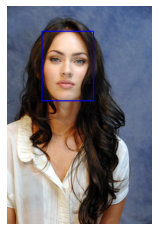

In [125]:
#example image from dataset
#display of image and bounding box around the face
print("EXAMPLE IMAGE IN DATASET")
print("IMAGE INFO: NAME, x, y, width, height : ")
pp = -16
print(images_info_test[pp])


path = images_info_test[pp][0]
img = cv2.imread(path)


image = cv2.rectangle(img, (int(images_info_test[pp][1]), int(images_info_test[pp][2])),(int(images_info_test[pp][3]) + 
                                                                               int(images_info_test[pp][1]),
                                              int(images_info_test[pp][4]) + int(images_info_test[pp][2])) , (255, 0, 0), 5)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

#### Images data

In [126]:
train_size = len(images_info_train)
test_size = len(images_info_test)
resize_size = 100

###### Train images dataset

In [127]:
#directory for test dataset
try:
    os.makedirs("train_dataset")
except FileExistsError:
    # directory already exists
    pass

In [128]:
#creating image train dataset

for i in range(0,train_size):

    image_info = images_info_train[i]
    image_path = image_info[0]
    
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    x = int(image_info[1])
    y = int(image_info[2])
    width = int(image_info[3])
    height = int(image_info[4])
    

    #rescaling images to 100x100 pixels, variable resize_size = 100
    original_height = img.shape[0]
    original_width = img.shape[1]
    
    
    images_info_train[i][1] = float(x/(original_width/resize_size))
    images_info_train[i][2] = float(y/(original_height/resize_size))
    images_info_train[i][3] = float(width/(original_width/resize_size))
    images_info_train[i][4] = float(height/(original_height/resize_size))
    
    #cv2.rectangle(img, (x, y), (x + width, y + height), (255, 0, 0), 5)

    img = cv2.resize(img, (resize_size, resize_size)) 
    
    #save image to folder train_dataset
    cv2.imwrite("train_dataset"+'\\'+image_path.split("/")[3], img)


In [129]:
import csv

f = open('cvs_train.cvs', 'w')

writer = csv.writer(f)

i = 0

while i < len(images_info_train):
    row = [images_info_train[i][1], images_info_train[i][2], images_info_train[i][3], images_info_train[i][4]]
    writer.writerow(row)
    i = i + 1

f.close()

##### Test images dataset

In [130]:
#directory for test dataset
try:
    os.makedirs("test_dataset")
except FileExistsError:
    # directory already exists
    pass

In [131]:
#creating image test dataset

for i in range(0,test_size):

    image_info = images_info_test[i]
    image_path = image_info[0]
    
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    x = int(image_info[1])
    y = int(image_info[2])
    width = int(image_info[3])
    height = int(image_info[4])
    

    #rescaling images to 100x100 pixels, variable resize_size = 100
    original_height = img.shape[0]
    original_width = img.shape[1]
    
    
    images_info_test[i][1] = float(x/(original_width/resize_size))
    images_info_test[i][2] = float(y/(original_height/resize_size))
    images_info_test[i][3] = float(width/(original_width/resize_size))
    images_info_test[i][4] = float(height/(original_height/resize_size))
    
    #cv2.rectangle(img, (x, y), (x + width, y + height), (255, 0, 0), 5)

    img = cv2.resize(img, (resize_size, resize_size)) 
    
    #save image to folder test_dataset
    cv2.imwrite("test_dataset"+'\\'+image_path.split("/")[3], img)


In [132]:
import csv

f = open('cvs_test.cvs', 'w')

writer = csv.writer(f)

i = 0

while i < len(images_info_test):
    row = [images_info_test[i][1], images_info_test[i][2], images_info_test[i][3], images_info_test[i][4]]
    writer.writerow(row)
    i = i + 1

f.close()

### MODEL

In [133]:
import torch.nn as nn
import torch.nn.functional as f

class cnn_model(nn.Module):

    def __init__(self):
        
        super(cnn_model, self).__init__()

        self.conv1 = nn.Conv2d(
            in_channels=3,
            out_channels=32,
            kernel_size=5,
            stride=1,
            padding=0
        )

        self.conv2 = nn.Conv2d(
            in_channels=32,
            out_channels=64,
            kernel_size=5,
            stride=1,
            padding=0
        )

        self.conv3 = nn.Conv2d(
            in_channels=64,
            out_channels=128,
            kernel_size=5,
            stride=1,
            padding=0
        )


        self.fc1 = nn.Linear(
            in_features=18*18*128,
            out_features=2046
        )

        self.fc2 = nn.Linear(
            in_features=2046,
            out_features=4
        )

    def forward(self, val):
        val = f.relu(self.conv1(val))
        val = f.max_pool2d(val, kernel_size=2, stride=2)
        val = f.relu(self.conv2(val))
        val = f.max_pool2d(val, kernel_size=2, stride=2)
        val = f.relu(self.conv3(val))
        val = val.view(-1, 18*18*128)
        val = f.dropout(f.relu(self.fc1(val)), p=0.5, training=self.training)
        val = self.fc2(val)

        return val

In [134]:
model = cnn_model()

In [135]:
from torchsummary import summary

summary(model, (3, 100, 100))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 96, 96]           2,432
            Conv2d-2           [-1, 64, 44, 44]          51,264
            Conv2d-3          [-1, 128, 18, 18]         204,928
            Linear-4                 [-1, 2046]      84,853,758
            Linear-5                    [-1, 4]           8,188
Total params: 85,120,570
Trainable params: 85,120,570
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.11
Forward/backward pass size (MB): 3.53
Params size (MB): 324.71
Estimated Total Size (MB): 328.35
----------------------------------------------------------------


In [136]:
i = 0

test_images_l = []

while i < len(images_info_test):
    img = cv2.imread("./test_dataset/"+images_info_test[i][0].split("/")[3], cv2.IMREAD_COLOR) 
    arr = np.array(img)
    arr = arr.flatten()
    test_images_l.append(arr)
    i = i + 1

In [137]:
test_images_l[0].shape

(30000,)

In [138]:
i = 0

train_images_l = []

while i < len(images_info_train):
    
    img = cv2.imread("./train_dataset/"+images_info_train[i][0].split("/")[3], cv2.IMREAD_COLOR) 
    arr = np.array(img)
    arr = arr.ravel()
    train_images_l.append(arr.tolist())
    i = i + 1

In [1]:
def train_model(net, dataloader, batchSize, epochs, lr_rate, momentum):
    criterion = nn.MSELoss()
    optimization = optim.SGD(net.parameters(), lr=lr_rate, momentum=momentum)
    scheduler = optim.lr_scheduler.StepLR(optimization, step_size=30, gamma=0.1)

    for epoch in range(epochs):
        
        loss_avg = 0
        
        for i, data in enumerate(dataloader):
            optimization.zero_grad()

            inputs, labels = data

            inputs, labels = inputs.view(batchSize, 3, 100, 100), labels.view(batchSize, 4)

            outputs = net(inputs)

            loss = criterion(outputs, labels)
            loss.backward()
            optimization.step()
            
            loss_avg = loss_avg + loss.item()
        
        scheduler.step()
        print("epoch: " + str(epoch) + " , loss: " + str(loss_avg/batchSize))


In [139]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

class training_dataset(Dataset):
    
    def __init__(self):
        trainX = np.asarray(train_images_l)
        self.len = len(trainX)
        
        trainY = np.asarray(pd.read_csv('cvs_train.cvs', sep=',', header=None))
        
        self.features_train = torch.Tensor(trainX)
        self.groundTruth_train = torch.Tensor(trainY)

    def __getitem__(self, item):
        return self.features_train[item], self.groundTruth_train[item]

    def __len__(self):
        return self.len

In [140]:
ts = training_dataset()

In [144]:
import torch.optim as optim

learning_rate = 0.000001
momentum = 0.9
batch = 20
no_of_workers = 0
shuffle = True
epochs = 10

dataLoader = DataLoader(
        dataset=ts,
        batch_size=batch,
        shuffle=shuffle,
        num_workers=no_of_workers)

model = cnn_model()
model.train()

train_model(model, dataLoader, batch, epochs, learning_rate, momentum)

epoch : 1/10 ,  loss: 3172.587688064575
epoch : 2/10 ,  loss: 2910.3286640167235
epoch : 3/10 ,  loss: 2750.7666412353515
epoch : 4/10 ,  loss: 2618.745642089844
epoch : 5/10 ,  loss: 2466.555673980713
epoch : 6/10 ,  loss: 2400.606444168091
epoch : 7/10 ,  loss: 2281.4997734069825
epoch : 8/10 ,  loss: 2207.815330505371
epoch : 9/10 ,  loss: 2093.0789333343505
epoch : 10/10 ,  loss: 1966.6181381225585


In [145]:
torch.save(model.state_dict(), './model.pth')

###### example test for images in test dataset

In [146]:
def test_image(index):
    
    img = cv2.imread("./test_dataset/"+images_info_test[index][0].split("/")[3], cv2.IMREAD_COLOR) 
    image_true = cv2.rectangle(img, (int(images_info_test[index][1]), int(images_info_test[index][2])),(int(images_info_test[index][3]) + 
                                                                               int(images_info_test[index][1]),
                                              int(images_info_test[index][4]) + int(images_info_test[index][2])) , (255, 0, 0), 1)
    #image_true = cv2.resize(image, (600, 800))
    
    inputs = torch.Tensor(np.array(img).ravel())
    inputs = inputs.view(1,3, 100, 100)
    predict = torch.squeeze(model(inputs)).tolist()
    
    print("true value of bounding box:")
    print(images_info_test[index][1:])
    print()
    print("predicted value of bounding box:")
    print(predict)
    
    img = cv2.imread("./test_dataset/"+images_info_test[index][0].split("/")[3], cv2.IMREAD_COLOR) 
    image_pred = cv2.rectangle(img, (int(predict[0]), int(predict[1])),(int(predict[2]) + 
                                                                               int(predict[0]),
                                              int(predict[3]) + int(predict[1])) , (255, 0, 0), 1)
    #image_pred = cv2.resize(image_pred, (600, 800))
    
    plt.subplot(1, 2, 1)

    plt.imshow(cv2.cvtColor(image_true, cv2.COLOR_BGR2RGB))
    plt.title("true")
    plt.axis('off')
    plt.show()

    plt.subplot(1, 2, 2)

    plt.imshow(cv2.cvtColor(image_pred, cv2.COLOR_BGR2RGB))
    plt.title("predicted")
    plt.axis('off')
    plt.show()

0. Image

true value of bounding box:
[48.92578125, 11.72161172161172, 27.83203125, 32.45421245421245]

predicted value of bounding box:
[50.22315216064453, 19.720836639404297, 19.57120704650879, 23.60441780090332]


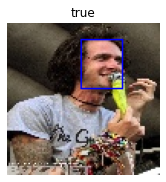

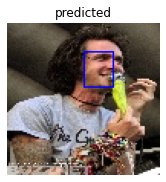

2. Image

true value of bounding box:
[62.79296875, 21.875, 31.640625, 36.00260416666667]

predicted value of bounding box:
[47.569480895996094, 18.482444763183594, 31.90749168395996, 52.036380767822266]


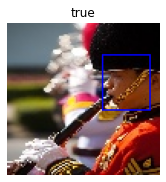

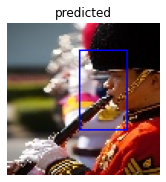

4. Image

true value of bounding box:
[30.6640625, 33.96923076923077, 11.1328125, 5.292307692307692]

predicted value of bounding box:
[38.2485237121582, 18.90230941772461, 13.472579956054688, 16.3592472076416]


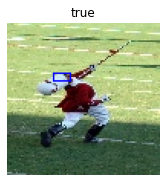

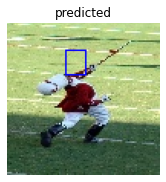

In [159]:
#test for images in test dataset
pics = [0, 2, 4]
for i in pics:
    print(str(i) + ". Image")
    print()
    test_image(i)